In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [147]:
from sklearn.datasets import make_moons

In [148]:
X,y = make_moons(
                    n_samples=1000,
                    noise = 0.095,
                    shuffle = True
)

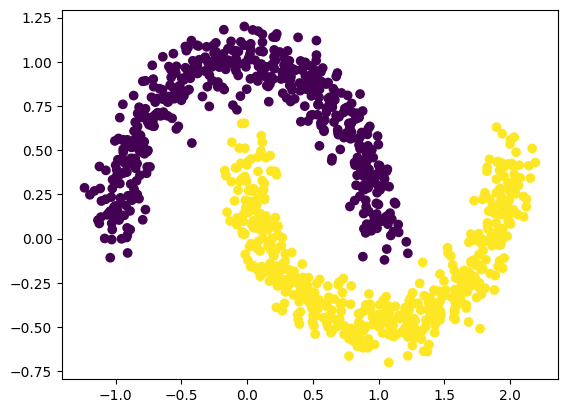

In [149]:
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y
)
plt.show()

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = StandardScaler().fit_transform(X)

In [152]:
from sklearn.cluster import DBSCAN

In [186]:
dbs = DBSCAN(
                eps = 0.2, # Really highly hyper sensitive parameter.
                min_samples = 5,
                metric = "euclidean"
)

In [ ]:
y_pred = dbs.fit_predict(X)

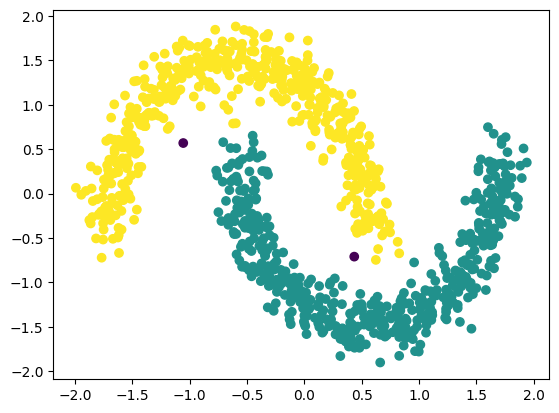

In [ ]:
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y_pred
)
plt.show()

In [189]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(
    n_samples = 500,
    noise = 0.085,
    factor = 0.55,
)


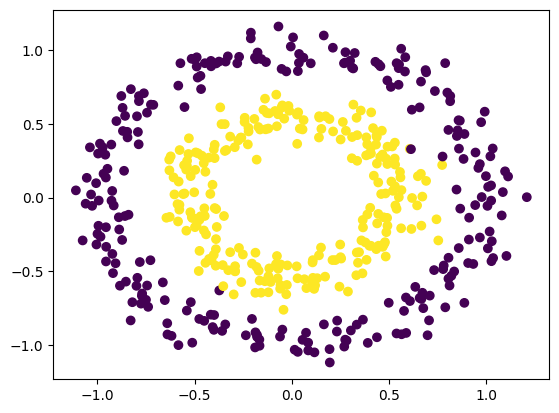

In [220]:
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y
)
plt.show()

In [261]:
X = StandardScaler().fit_transform(X)

In [262]:
# from sklearn.neighbors import NearestNeighbors
# neighbors = NearestNeighbors(n_neighbors=5)
# neighbors_fit = neighbors.fit(X)
# distances, indices = neighbors_fit.kneighbors(X)

# # Sort distances and plot
# distances = np.sort(distances[:, 4], axis=0)
# plt.plot(distances)
# plt.ylabel("Epsilon (Distance to 5th Neighbor)")
# plt.xlabel("Points sorted by distance")
# plt.axhline(y=0.165, color='r', linestyle='--') # The "Elbow"
# plt.show()

In [266]:
dbs = DBSCAN(
    eps = 0.235
)

In [267]:
y_pred = dbs.fit_predict(X)

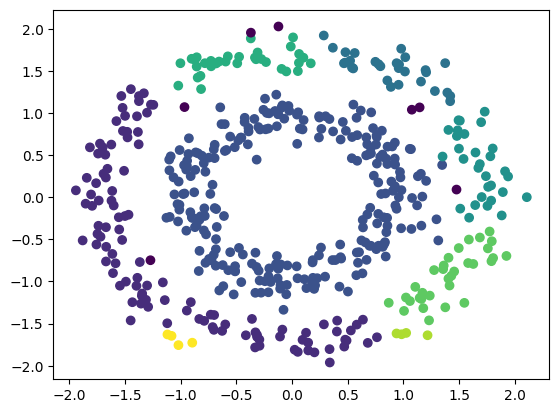

In [268]:
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred
)
plt.show()